# Stock Market Analysis Project - SOLUTIONS

Welcome to your first capstone project! This project is meant to cap off the first half of the course, which mainly dealt with learning the libraries that we use in this course, the second half of the course will deal a lot more with quantitative trading techniques and platforms.

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

______
## Part 1: Getting the Data

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [133]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 1, 1)
tesla = web.DataReader("TSLA",data_source='yahoo',start= start,end= end)

In [134]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004


In [135]:
# tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [136]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM",'yahoo',start,end)

In [137]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,12.66,12.50,12.52,12.66,20773300.0,10.882895
2018-01-03,12.80,12.67,12.68,12.76,29765600.0,10.968857
2018-01-04,13.04,12.77,12.78,12.98,37478200.0,11.157975
2018-01-05,13.22,13.04,13.06,13.20,46121900.0,11.347092
2018-01-08,13.22,13.11,13.21,13.15,33828300.0,11.304111


In [138]:
# ford.to_csv('Ford_Stock.csv')

In [139]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,41.869999,41.150002,41.240002,41.799999,6934600.0,38.536655
2018-01-03,42.950001,42.200001,42.209999,42.820000,14591600.0,39.477020
2018-01-04,44.250000,43.009998,43.090000,44.139999,17298700.0,40.693970
2018-01-05,44.639999,43.959999,44.500000,44.009998,9643300.0,40.574112
2018-01-08,44.590000,43.520000,44.040001,44.220001,13099600.0,40.767723


In [140]:
# gm.to_csv('GM_Stock.csv')

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

In [141]:
# Code Here

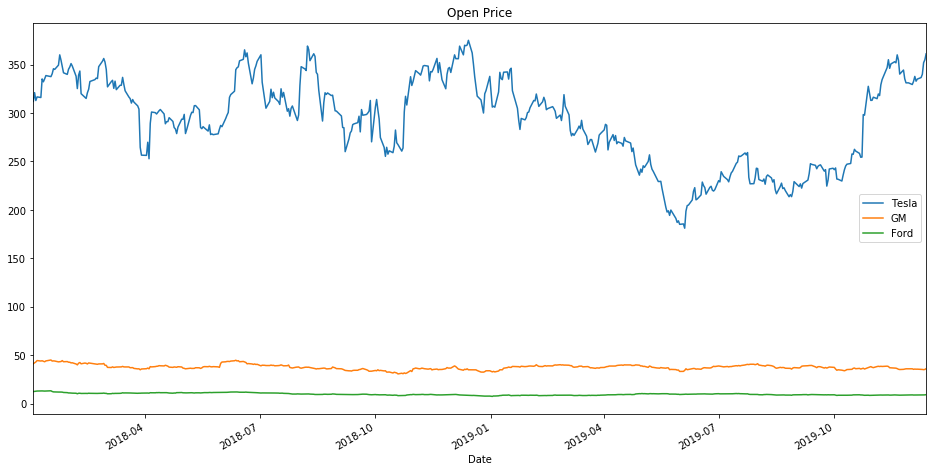

In [142]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

** Plot the Volume of stock traded each day.**

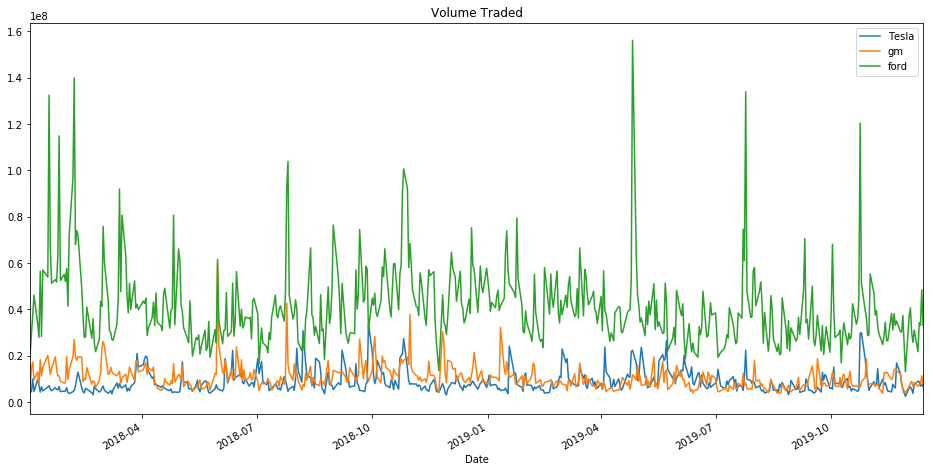

In [143]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [144]:
ford['Volume'].argmax()

Timestamp('2019-04-26 00:00:00')

In [145]:
# What happened:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf


____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [146]:
# Code Here 

In [147]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

** Plot this "Total Traded" against the time index.**

In [148]:
# Code here

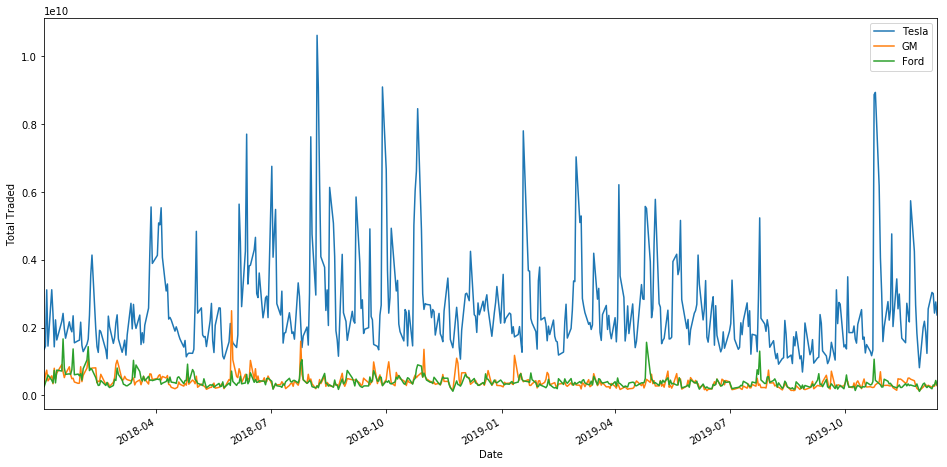

In [149]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [150]:
tesla['Total Traded'].argmax()

Timestamp('2018-08-07 00:00:00')

In [151]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

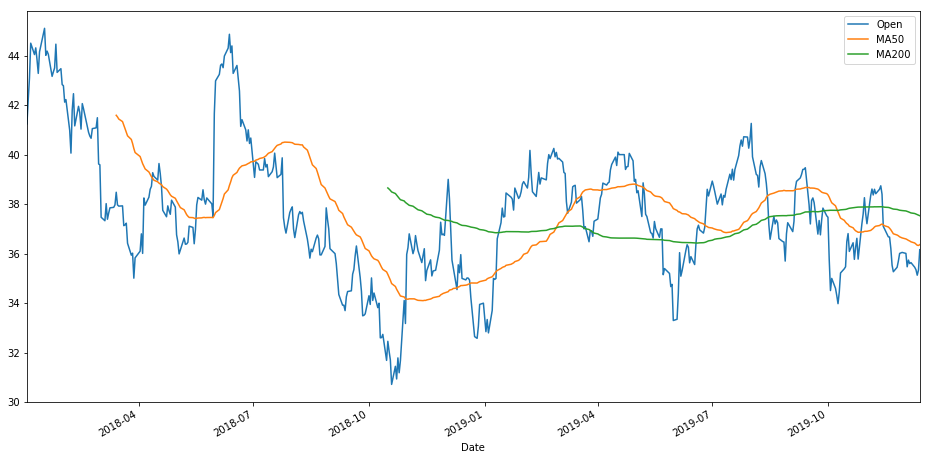

In [152]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [153]:
# from pandas.plotting import scatter_matrix

In [154]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [155]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [156]:
# You can use a semi-colon to remove the axes print outs
car_comp.corr()

,Tesla Open,GM Open,Ford Open
Tesla Open,1.000000,0.195673,0.155831
GM Open,0.195673,1.000000,0.628681
Ford Open,0.155831,0.628681,1.000000


_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

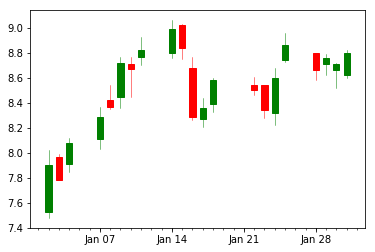

In [157]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
ford_reset = ford.loc['2019-01':'2019-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
# fig, ax = plt.subplots()
# fig.subplots_adjust(bottom=0.4)

fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [202]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999,1.357886e+09,NaN,NaN
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000,1.451402e+09,-0.010233,0.989767
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995,3.111899e+09,-0.008290,0.981562
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987,1.453666e+09,0.006230,0.987677
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004,3.115570e+09,0.062638,1.049543


In [203]:
tesla['returns'] = tesla['Close'].pct_change(1)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2018-01-02,322.109985,311.000000,312.000000,320.529999,4352200,320.529999,1.357886e+09,NaN,NaN
2018-01-03,325.250000,315.549988,321.000000,317.250000,4521500,317.250000,1.451402e+09,-0.010233,0.989767
2018-01-04,318.549988,305.679993,312.869995,314.619995,9946300,314.619995,3.111899e+09,-0.008290,0.981562
2018-01-05,317.239990,312.000000,316.619995,316.579987,4591200,316.579987,1.453666e+09,0.006230,0.987677
2018-01-08,337.019989,315.500000,316.000000,336.410004,9859400,336.410004,3.115570e+09,0.062638,1.049543


In [197]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2018-01-02,12.66,12.50,12.52,12.66,20773300.0,10.882895,2.600817e+08,NaN,NaN
2018-01-03,12.80,12.67,12.68,12.76,29765600.0,10.968857,3.774278e+08,0.007899,1.007899
2018-01-04,13.04,12.77,12.78,12.98,37478200.0,11.157975,4.789714e+08,0.017241,1.025276
2018-01-05,13.22,13.04,13.06,13.20,46121900.0,11.347092,6.023520e+08,0.016949,1.042654
2018-01-08,13.22,13.11,13.21,13.15,33828300.0,11.304111,4.468718e+08,-0.003788,1.038705


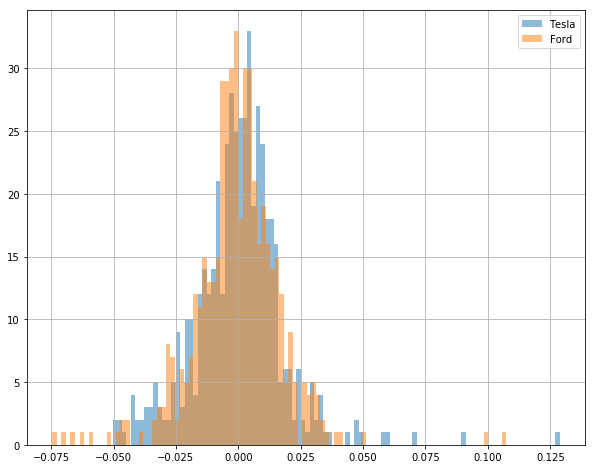

In [177]:
#tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

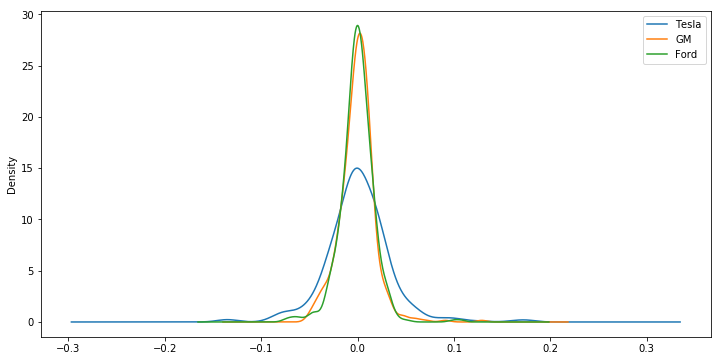

In [178]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** Try also creating some box plots comparing the returns. **

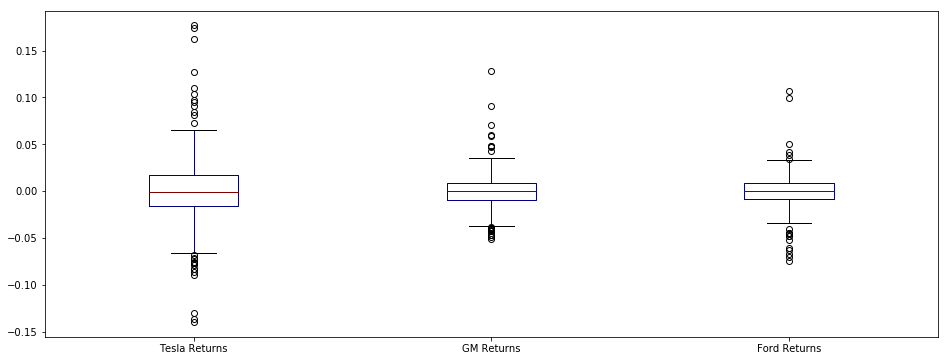

In [189]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(16,6),colormap='jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [184]:
# scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

NameError: name 'scatter_matrix' is not defined

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

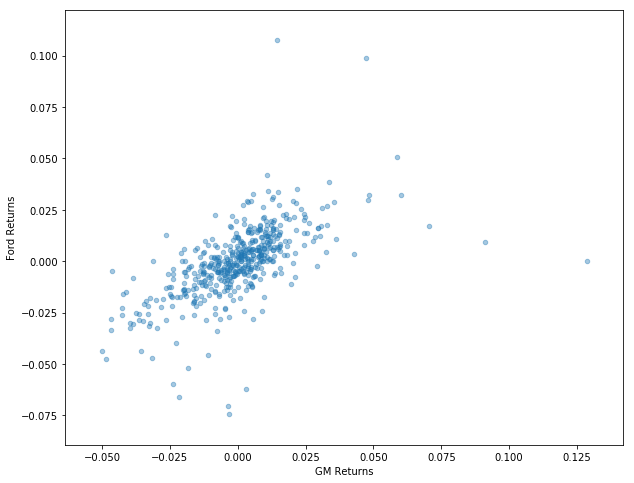

In [190]:
box_df.plot(kind='scatter',x='GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

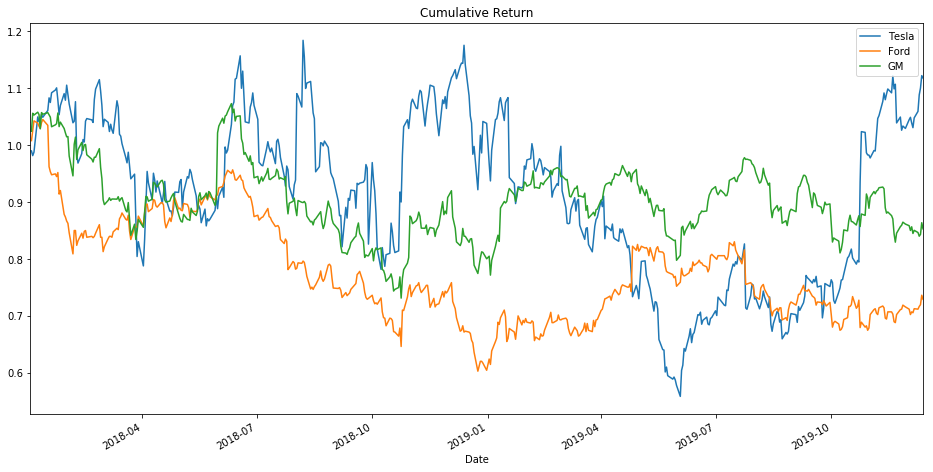

In [196]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()